In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


In [3]:
# Define columns for import
columns = [ 'Offer_Id',
            'Type',
            'Fuel_Type',
            'Transmission',
            'Dealer_PLZ',
            'Dealer_City',
            'Dealer_Street_House_Nr',
            'Init_Regist_MY',
            'Init_Regist_Month',
            'Init_Regist_Year',
            'Init_Regist_Dt',
            'Make',
            'Mileage',
            'HP',
            'Price']

# Read and select variables
df_orig = pd.read_csv("/workspaces/python_machine_learning_basics/CART_RandomForest/Data/autoscout24_data_enriched_cleaned.csv", 
                      sep=",", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['Price'] >= 500) &     # quick and dirty Lösung: mit Scatterplot gechecked. Sauber gemacht, sollte es auf den Residual sichtbar sein.
            (df['Price'] <= 150000)]

print(df.shape)
df.head(5)

(3949, 15)


,Offer_Id,Type,Fuel_Type,Transmission,Dealer_PLZ,Dealer_City,Dealer_Street_House_Nr,Init_Regist_MY,Init_Regist_Month,Init_Regist_Year,Init_Regist_Dt,Make,Mileage,HP,Price
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,Diesel,Automatisiertes Schaltgetriebe,8488,Turbenthal,Mettlenstrasse 3,10.2014,10.0,2014.0,2014-10,AUDI,75000,245,22500
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),Benzin,Automat sequentiell,3186,Düdingen,Brugerastrasse 60,6.2013,6.0,2013.0,2013-06,MERCEDES-BENZ,46655,184,23749
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,Benzin,Automat sequentiell,1262,Eysins,1262 Eysins,6.2011,6.0,2011.0,2011-06,MERCEDES-BENZ,138955,306,18500
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,Benzin,Automatisiertes Schaltgetriebe,4314,Zeiningen,Am Stutz 21,8.2015,8.0,2015.0,2015-08,MERCEDES-BENZ,43000,360,36000
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,Benzin,Automatisiertes Schaltgetriebe,3250,Lyss,3250 Lyss,9.2018,9.0,2018.0,2018-09,AUDI,43300,252,48500


In [4]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['Mileage'],     # Wert mit Erklärung
                                                    df['Price'],    # Zielvariabel
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
3785    239000
1410     77000
2788    134000
3356    165000
1119     79000
Name: Mileage, dtype: int64 

y_train:
3785     6900
1410    19956
2788    12300
3356    19900
1119    14800
Name: Price, dtype: int64


In [5]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            42462.72
Slope of regression line (beta):          -0.172
p-value:                                  0.0000
R-squared (coefficient of determination): 0.2221


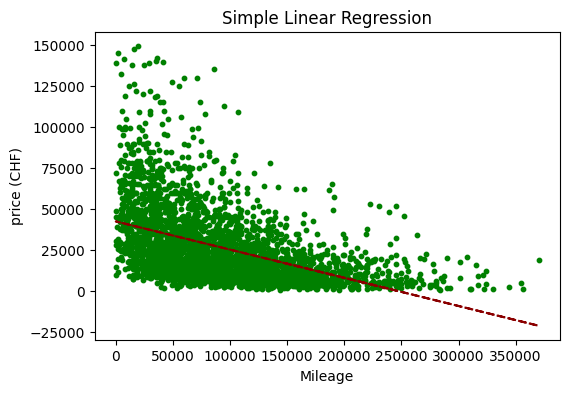

In [6]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Mileage')
plt.ylabel('price (CHF)')

plt.show()

In [7]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 1417.56
1st Observed price in dataset: 22500.00
1st Residual price in dataset: 21082.44


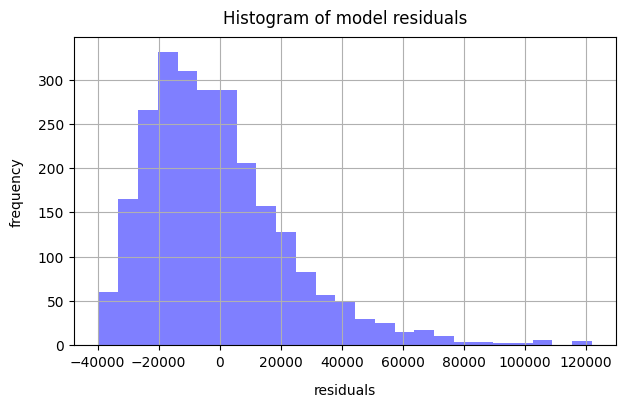

In [8]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

In [9]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 3000.0, Predicted price: -4335.6
Observed price: 15500.0, Predicted price: 22300.8
Observed price: 29999.0, Predicted price: 17303.2
Observed price: 25500.0, Predicted price: 29754.2
Observed price: 23900.0, Predicted price: 32673.7
Observed price: 18000.0, Predicted price: 20652.1
Observed price: 2900.0, Predicted price: 31643.3
Observed price: 42900.0, Predicted price: 27604.0
Observed price: 25000.0, Predicted price: 36795.4
Observed price: 9900.0, Predicted price: 7256.6


In [10]:
# Log transformed variable
df['price_log'] = np.log(df['Price'])

# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['Mileage',
                                                            'HP',
                                                            'Init_Regist_Year']], 
                                                        df['Price'], 
                                                        # df['price_log'],
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
      Mileage   HP  Init_Regist_Year
3785   239000  344            2007.0
1410    77000  265            2013.0
2788   134000  184            2011.0
3356   165000  270            2011.0
1119    79000  175            2013.0 

y2_train:
3785     6900
1410    19956
2788    12300
3356    19900
1119    14800
Name: Price, dtype: int64


In [11]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create a Gradient Boosting Classifier     testen mit dieser Variante
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1545.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:08:50   Log-Likelihood:                -34667.
No. Observations:                3159   AIC:                         6.934e+04
Df Residuals:                    3155   BIC:                         6.937e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.315e+05   5.73e+04  

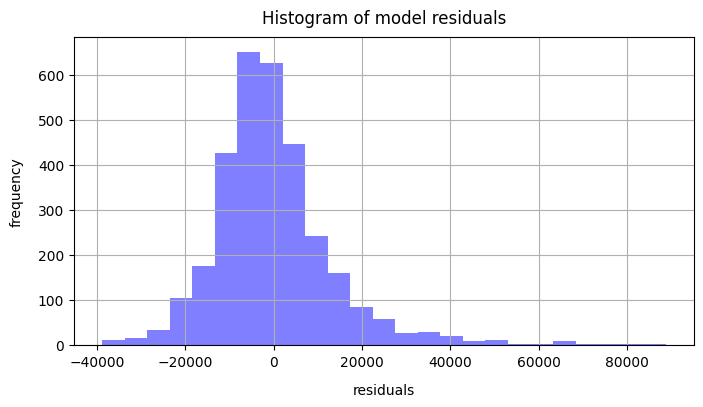

In [12]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()

In [13]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 3000.0, Predicted price: 4915.7
Observed price: 15500.0, Predicted price: 23320.4
Observed price: 29999.0, Predicted price: 49368.5
Observed price: 25500.0, Predicted price: 36268.5
Observed price: 23900.0, Predicted price: 40521.3
Observed price: 18000.0, Predicted price: 29211.9
Observed price: 2900.0, Predicted price: 20296.1
Observed price: 42900.0, Predicted price: 32272.6
Observed price: 25000.0, Predicted price: 22670.6
Observed price: 9900.0, Predicted price: 3816.2
